## Libraries

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Functions

In [2]:
def highest_level(NoEffectLevel,LowestEffectLevel,ProbableEffectLevel,SevereEffectLevel):
    if SevereEffectLevel == 'Exceedance':
        return 'SevereEffectLevel'
    elif ProbableEffectLevel == 'Exceedance':
        return 'ProbableEffectLevel'
    elif LowestEffectLevel == 'Exceedance':
        return 'LowestEffectLevel'
    elif NoEffectLevel == 'Exceedance':
        return 'NoEffectLevel'
    else:
        return 'NotExceeded'

## Load data

In [3]:
sediment = pd.read_csv("LakeOntarioNearshore_SedimentQuality.csv")
sediment['highest exceeded level'] = sediment.apply(lambda row: highest_level(row['NoEffectLevel'], row['LowestEffectLevel'], row['ProbableEffectLevel'], row['SevereEffectLevel']), axis=1)

## % samples exceeded per category and parmeter

In [4]:
pivot_table = pd.pivot_table(sediment, values='RegionalUnitID', index=['Category', 'Parameter'],
                              columns=['highest exceeded level'], aggfunc=len)

pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

column_order = ['NotExceeded', 'NoEffectLevel', 'LowestEffectLevel', 'ProbableEffectLevel', 'SevereEffectLevel']

pivot_table = pivot_table.reindex(columns=column_order)

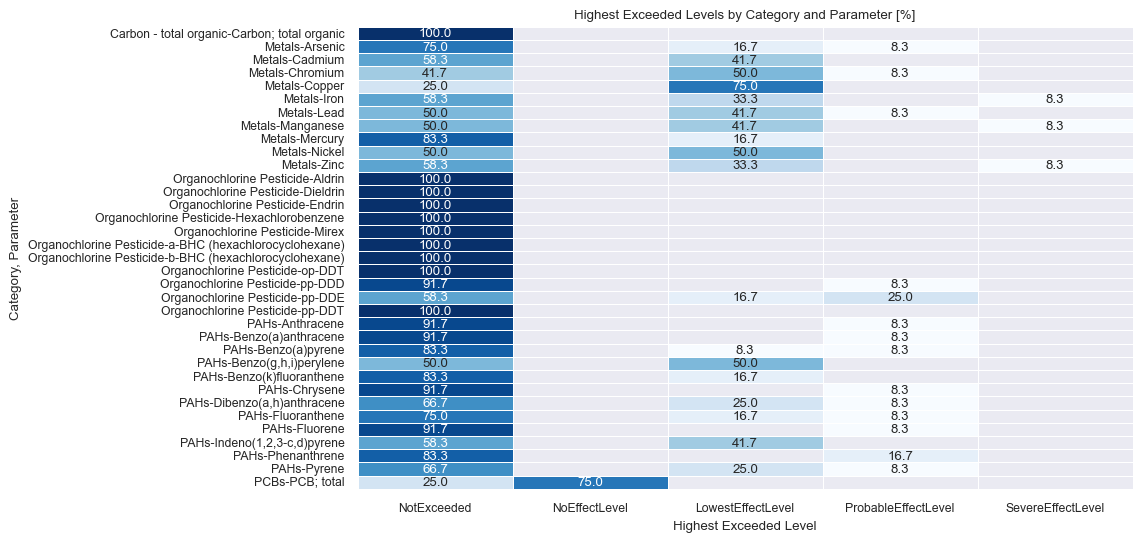

In [5]:
sns.set(font_scale=0.8)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='.1f', linewidths=.5, cbar=False)
plt.title('Highest Exceeded Levels by Category and Parameter [%]')
plt.xlabel('Highest Exceeded Level')
plt.ylabel('Category, Parameter')

plt.show()

## SevereEffectLevel Exceeded

In [6]:
sediment_exceeded = sediment.copy()

sediment_exceeded = sediment_exceeded[sediment_exceeded['highest exceeded level'] == 'SevereEffectLevel']
sediment_exceeded[['Category', 'Parameter', 'RegionalUnitMedian', 'Unit']]

,Category,Parameter,RegionalUnitMedian,Unit
42,Metals,Iron,62000.0,UG/G DRY
43,Metals,Manganese,2400.0,UG/G DRY
44,Metals,Zinc,1200.0,UG/G DRY


In [8]:
import plotly.express as px

fig = px.scatter_mapbox(sediment_exceeded, lat='y_centroid', lon='x_centroid', 
                        text="RegionalUnitID", zoom=11, height=400)
fig.update_layout(mapbox_style="carto-positron", title='SevereEffectLevel Exceeded', title_x=0.5)
fig.update_traces(marker=dict(size=12, color='red'))

fig.show()